In [ ]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

dataset = 'D1'

df = pd.read_csv('alltrials.csv', sep=';')
data = df[df['f1']!=0]

testD = data[data['dataset']==dataset]
trainD = data[data['dataset']!=dataset]


In [ ]:
features = ['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 
            'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 
            'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 
            'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity']

y_train = trainD[['f1']]
X_train = trainD[features]
X_test = testD[features]
y_test = testD[['f1']]

Transform categorigal variables

In [ ]:
X_train_dummy = pd.get_dummies(X_train)
X_test_dummy = pd.get_dummies(X_test)

dummy_features = X_train_dummy.columns

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummy)
X_test_scaled = scaler.transform(X_test_dummy)

# Exploratory Data Analysis

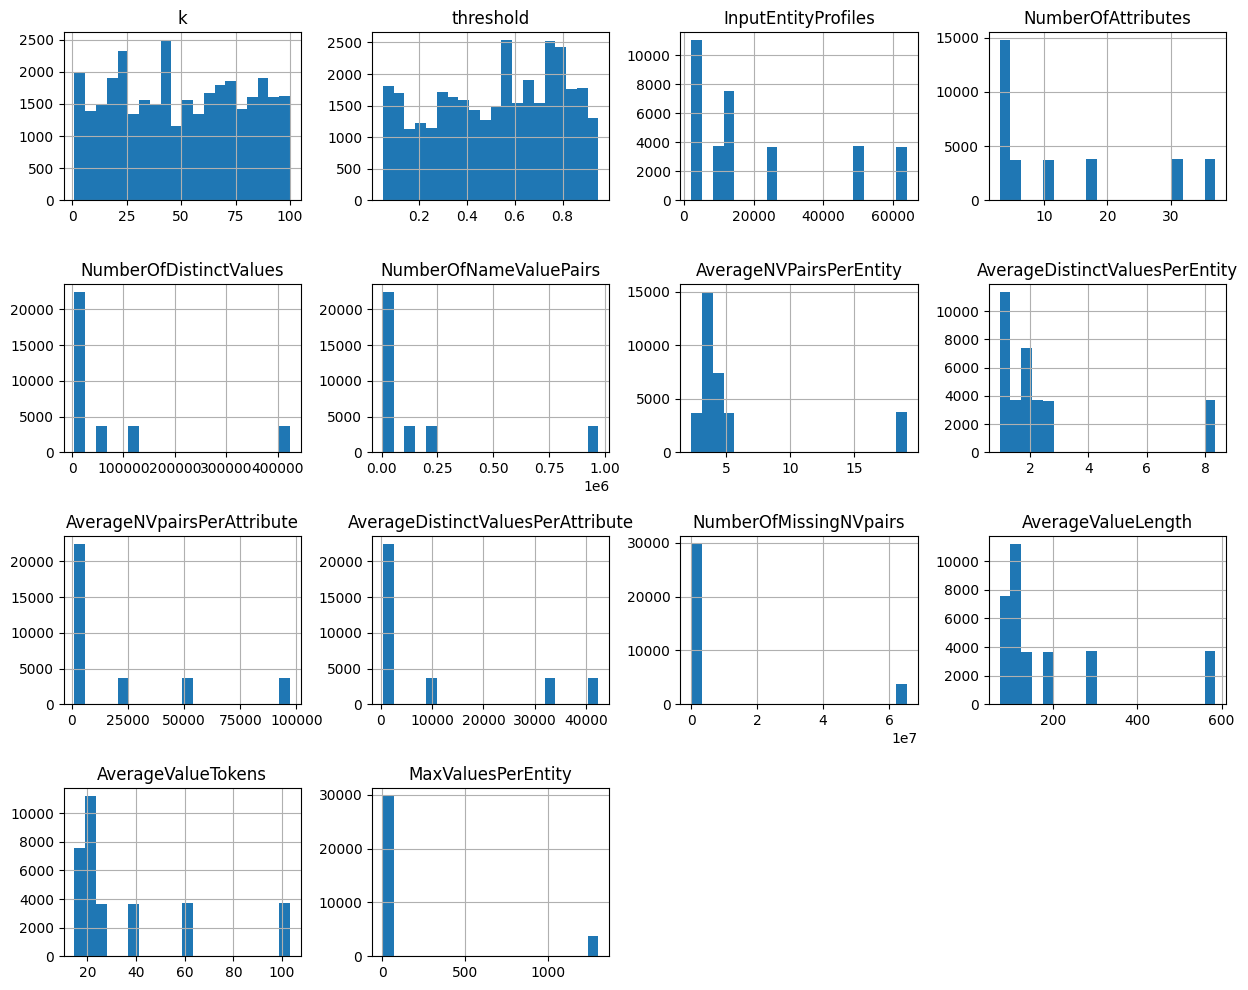

In [58]:
X_train.hist(figsize=(15, 12), bins=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

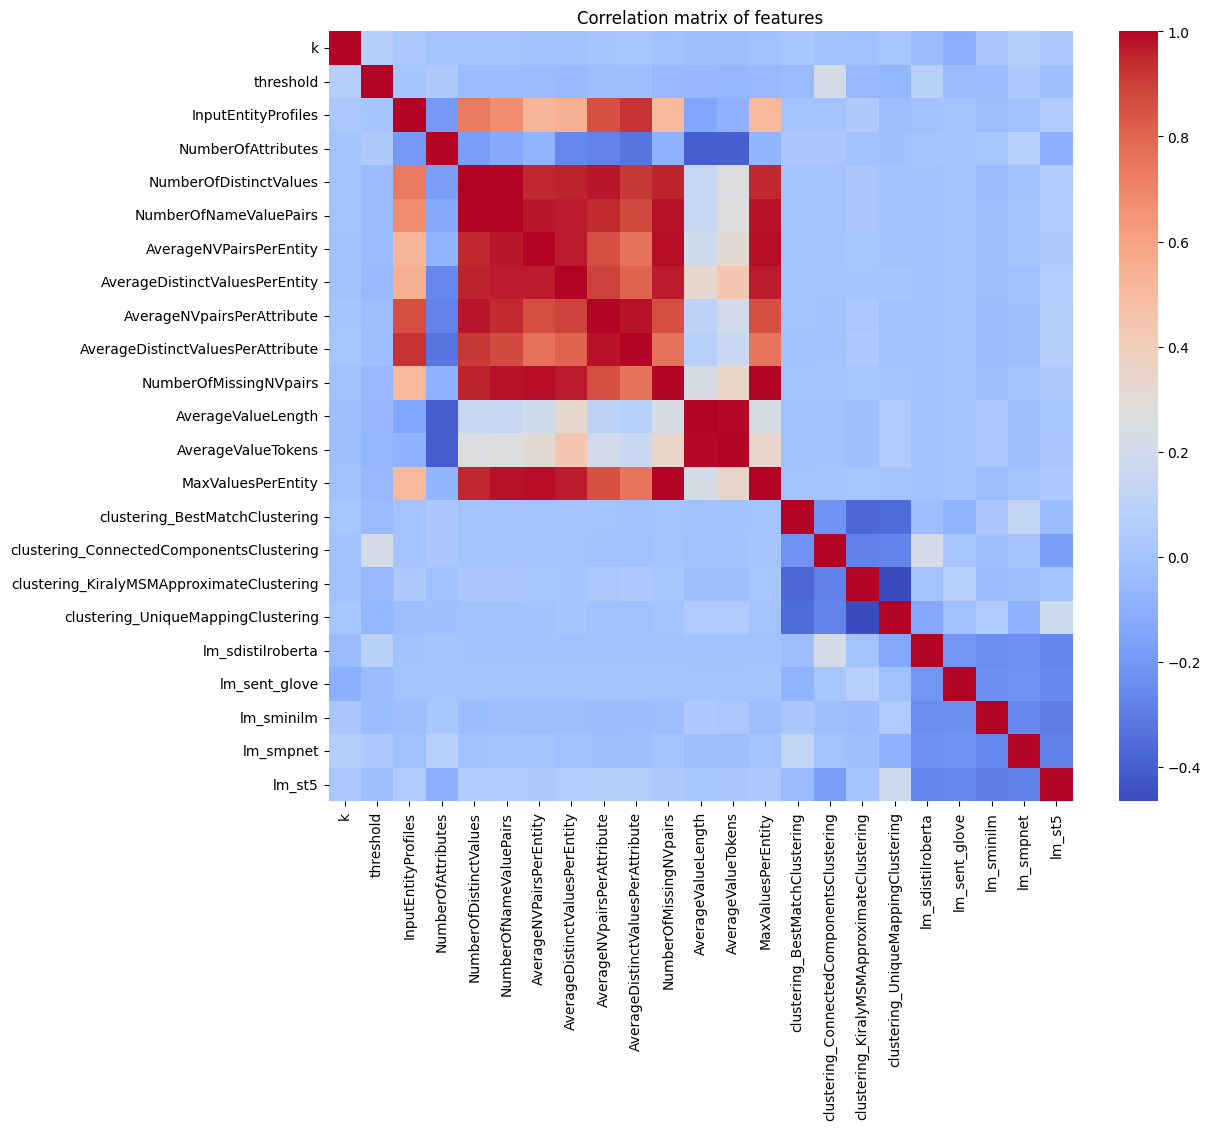

In [62]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_train_dummy.corr()
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of features')
plt.show()

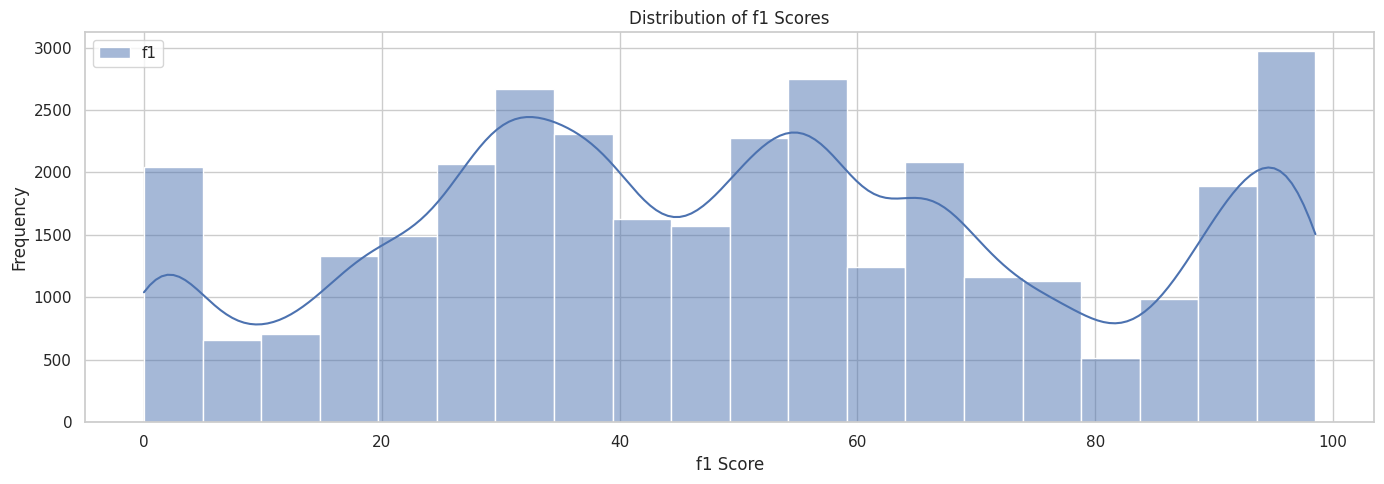

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with specified size
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

# Plot the distribution of the f1 scores
sns.histplot(y_train, bins=20, kde=True)
ax.set_title('Distribution of f1 Scores')
ax.set_xlabel('f1 Score')
ax.set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to hold model performance
performance = {}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {'MSE': mse, 'R^2': r2}

performance

{'Linear Regression': {'MSE': 1.1698503631212397e+21,
  'R^2': -8.124285986811304e+18},
 'Random Forest': {'MSE': 311.68703637078056, 'R^2': -1.1645799340538772},
 'Gradient Boosting': {'MSE': 727.0966687536736, 'R^2': -4.049484500951045}}

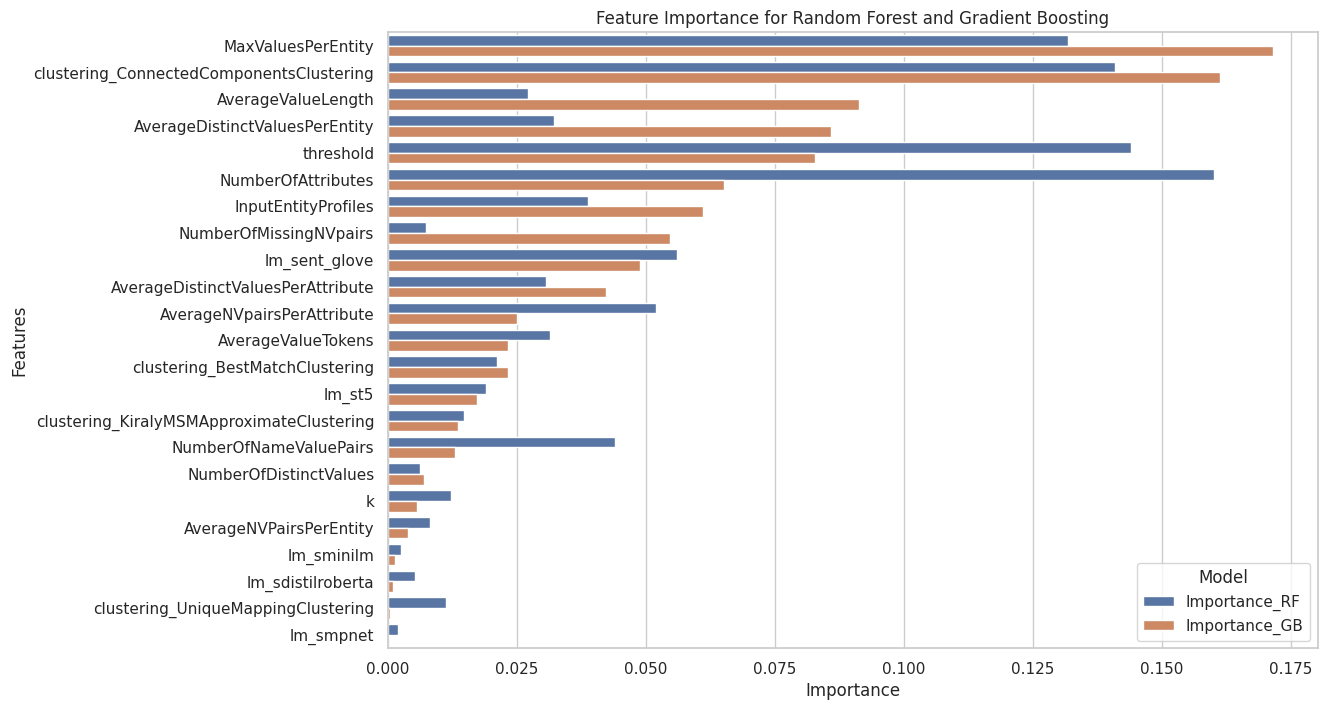

In [74]:
# Extract feature importance from Random Forest and Gradient Boosting models
importance_rf = models['Random Forest'].feature_importances_
importance_gb = models['Gradient Boosting'].feature_importances_
# importance_lr = models['Linear Regression'].coef_[0]

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': dummy_features,
    'Importance_RF': importance_rf,
    'Importance_GB': importance_gb,
    # 'Importance_LR': importance_lr
}).sort_values(by='Importance_GB', ascending=False)  # Sorting by Gradient Boosting importance for display

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.melt(id_vars="Feature"), x='value', y='Feature', hue='variable')
plt.title('Feature Importance for Random Forest and Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.legend(title='Model')
plt.show()

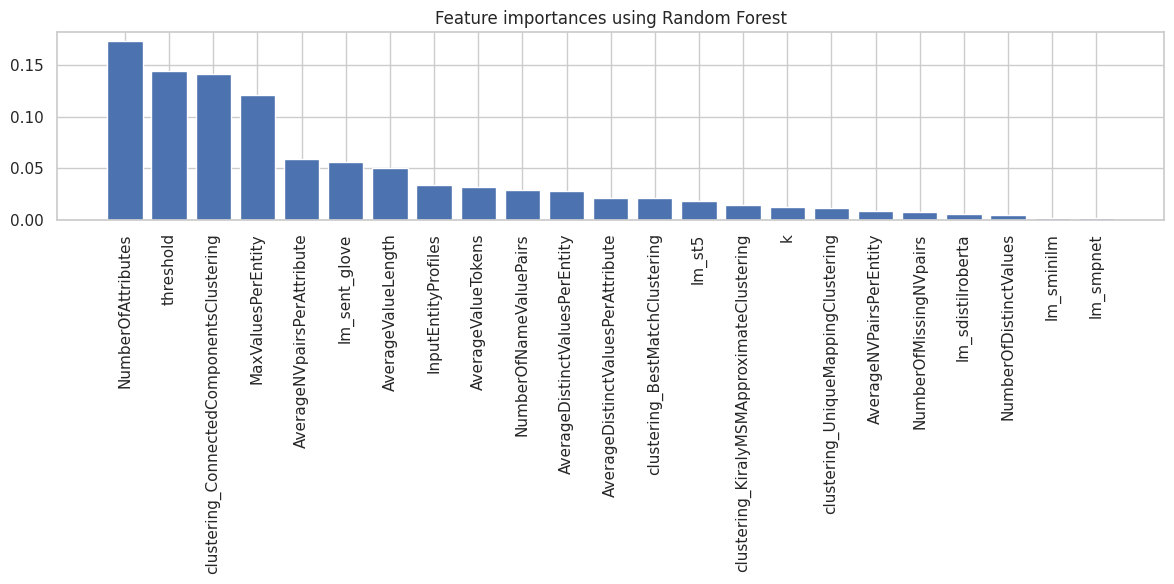

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature importances using Random Forest')
# print(len(train_X))
# print(len(importances))
plt.bar(range(len(dummy_features)), importances[indices], align='center')
plt.xticks(range(len(dummy_features)), np.array(dummy_features)[indices], rotation=90)
plt.tight_layout()
plt.show()

## Permutation Importance

Interpreting the Results
The output from permutation_importance includes:

- importances_mean: An array with the average decrease in model score across the shuffling repetitions for each feature. Larger values indicate higher importance.
- importances_std: An array with the standard deviation of the score decreases across the shuffling repetitions for each feature. A high standard deviation indicates variability in the importance estimate across repeats.
- importances: A raw array of shape (n_features, n_repeats), detailing the decrease in model score for each feature across each repetition.

In [77]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_train_scaled, y_train, n_repeats=10)

In [78]:
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{dummy_features[i]:<8}:"
              f" {result.importances_mean[i]:.3f} "
              f" +/- {result.importances_std[i]:.3f}")

clustering_ConnectedComponentsClustering: 0.461  +/- 0.007
threshold: 0.447  +/- 0.004
NumberOfAttributes: 0.325  +/- 0.001
MaxValuesPerEntity: 0.253  +/- 0.001
lm_sent_glove: 0.154  +/- 0.002
clustering_KiralyMSMApproximateClustering: 0.113  +/- 0.002
lm_st5  : 0.058  +/- 0.001
clustering_BestMatchClustering: 0.055  +/- 0.001
clustering_UniqueMappingClustering: 0.051  +/- 0.001
AverageNVpairsPerAttribute: 0.037  +/- 0.000
AverageValueLength: 0.030  +/- 0.000
k       : 0.020  +/- 0.001
InputEntityProfiles: 0.013  +/- 0.000
AverageDistinctValuesPerAttribute: 0.013  +/- 0.000
lm_sdistilroberta: 0.012  +/- 0.000
AverageValueTokens: 0.012  +/- 0.000
AverageDistinctValuesPerEntity: 0.011  +/- 0.000
NumberOfNameValuePairs: 0.009  +/- 0.000
NumberOfMissingNVpairs: 0.005  +/- 0.000
lm_sminilm: 0.004  +/- 0.000
AverageNVPairsPerEntity: 0.004  +/- 0.000
lm_smpnet: 0.003  +/- 0.000
NumberOfDistinctValues: 0.001  +/- 0.000


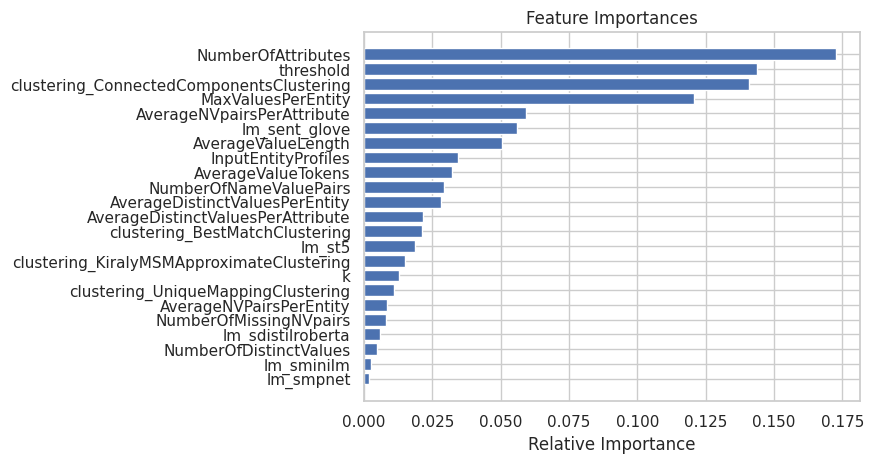

In [79]:
features = dummy_features
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()